In [83]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

import datetime
import os
import shapely

from matplotlib import pyplot as plt; plt.rcParams['figure.figsize'] = 15, 5

CAN_SHP = '../reports/shapefiles/Canada.shp' #Canada geography shape file
LOC_PKL_FILE = '../data/interim/locations.pkl' #Location pickle file

In [89]:
canada = gpd.read_file(CAN_SHP)
del canada['NOM'] #Drop the french name
canada.crs #Coordinate Reference System

{'datum': 'NAD83',
 'lat_0': 40,
 'lat_1': 50,
 'lat_2': 70,
 'lon_0': -96,
 'no_defs': True,
 'proj': 'aea',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

NAD83 (North American Datum, 1983) is the "datum", as in, where the coordinates a centered.  I believe...

'aea' is the 'Albers Equal Area' conic projection, the standard projection for north america, and a seemingly reasonable one to use for this project.

In [124]:
canada.plot?

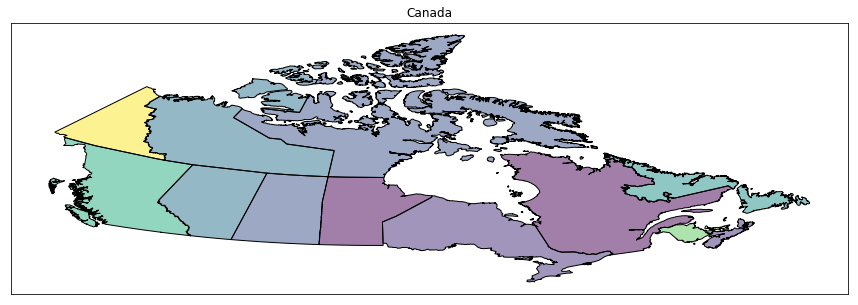

In [128]:
fig, ax = plt.subplots(1,1)
ax.set_title('Canada')
ax.axes.get_yaxis().set_ticks([]) #Remove x/y ticks
ax.axes.get_xaxis().set_ticks([])

canada.plot(ax = ax) #Specify color = 'white' to plot without colour

In [86]:
D_loc = pd.read_pickle(LOC_PKL_FILE)
D_loc.head()

,Name,WBAN,lat,long,first_year,last_year,time_correction,WBAN_file
0,CALGARY INT'L. A,25110,51.10,114.02,1953,2005,00:07:00,/home/ubuntu/science/dwglasso_cweeds/data/raw/...
1,COLD LAKE A,25129,54.42,110.28,1954,2005,00:07:00,/home/ubuntu/science/dwglasso_cweeds/data/raw/...
2,CORONATION,25113,52.10,111.45,1953,1994,00:07:00,/home/ubuntu/science/dwglasso_cweeds/data/raw/...
3,COWLEY A,CAN43,49.63,114.08,1953,1959,00:07:00,/home/ubuntu/science/dwglasso_cweeds/data/raw/...
4,EDMONTON INT'L. A,25142,53.32,113.58,1961,2005,00:07:00,/home/ubuntu/science/dwglasso_cweeds/data/raw/...


In [120]:
#WARN: Pay attention that point takes (x, y) arguments, hence give it (long, lat), NOT (lat, long)!
#WARN: The longitude values are provided as deg E, but should be deg W, so we add the negative sign.
Point = shapely.geometry.Point
stations = gpd.GeoDataFrame(pd.DataFrame(D_loc['Name'].values, columns = ['NAME']),
                            geometry = [Point(latlon) for latlon in zip(-D_loc['long'], D_loc['lat'])],
                            crs = {'init': 'epsg:4326'})
stations.to_crs(crs = canada.crs, inplace = True)

In [118]:
stations.head()

,NAME,geometry
0,CALGARY INT'L. A,POINT (-1244045.288702108 1386275.684583135)
1,COLD LAKE A,POINT (-911868.5052106386 1687317.050181715)
2,CORONATION,POINT (-1044573.911117709 1450721.522283968)
3,COWLEY A,POINT (-1291604.008476555 1229626.623984152)
4,EDMONTON INT'L. A,POINT (-1150156.227511135 1617983.975859029)


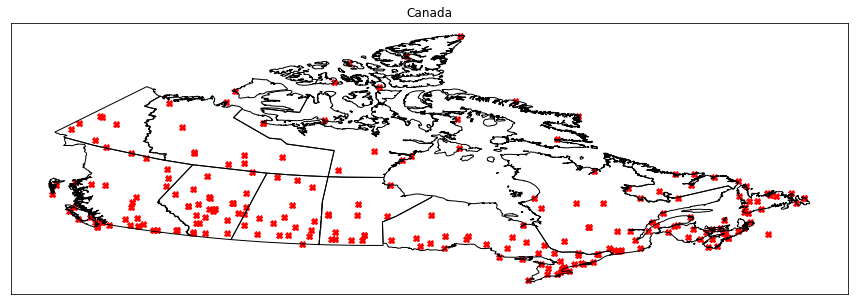

In [141]:
fig, ax = plt.subplots(1,1)
ax.set_title('Canada')
ax.axes.get_yaxis().set_ticks([]) #Remove x/y ticks
ax.axes.get_xaxis().set_ticks([])

stations.plot(ax = ax, marker = 'X', markersize = 6, color = 'red')
canada.plot(ax = ax, color = 'white')